# Guides to LiDAR (Part 1a - Visualizing point clouds in scene viewer)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Example-1:-Schiedam,-Netherland" data-toc-modified-id="Example-1:-Schiedam,-Netherland-1">Example 1: Schiedam, Netherland</a></span><ul class="toc-item"><li><span><a href="#Railway" data-toc-modified-id="Railway-1.1">Railway</a></span></li><li><span><a href="#Regional-Center" data-toc-modified-id="Regional-Center-1.2">Regional Center</a></span></li><li><span><a href="#Highway-A4" data-toc-modified-id="Highway-A4-1.3">Highway A4</a></span></li><li><span><a href="#Near-the-S.C.-Vlaardingen-Holy" data-toc-modified-id="Near-the-S.C.-Vlaardingen-Holy-1.4">Near the S.C. Vlaardingen Holy</a></span></li><li><span><a href="#De-Kameel" data-toc-modified-id="De-Kameel-1.5">De Kameel</a></span></li></ul></li><li><span><a href="#Example-2:-Barnegat-Bay,-New-Jersey" data-toc-modified-id="Example-2:-Barnegat-Bay,-New-Jersey-2">Example 2: Barnegat Bay, New Jersey</a></span><ul class="toc-item"><li><span><a href="#Water-front" data-toc-modified-id="Water-front-2.1">Water front</a></span></li><li><span><a href="#Water-tank" data-toc-modified-id="Water-tank-2.2">Water tank</a></span></li><li><span><a href="#Light-House" data-toc-modified-id="Light-House-2.3">Light House</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-3">References</a></span></li></ul></div>

In Part 1, we have learned the basic concepts of LiDAR, e.g. what are LiDAR, first return, point clouds and LAS Datasets. Now, in Part 1(a), we are going to explore how the LiDAR point clouds can be viewed in Scene Viewer, with two examples:

## Example 1: Schiedam, Netherland

At FedUC 2018, Madeline Schueren, from the Esri Geodesign team, introduced a web map with data from Schiedam, Netherlands. The <a href="https://www.esri.com/arcgis-blog/products/product/3d-gis/learn-by-doing-create-the-city-of-schiedam-3d-web-scene/">data</a> consisted of a collection of citywide LiDAR supplied by CycloMedia, a company specializing in collecting LiDAR over entire cities using terrestrial laser scanning <a href="#References">[1]</a>. 

Next, we will be re-using the same data in visualizing the point clouds via scene viewer. The first step, initiate a GIS object via `gis = GIS("https://www.arcgis.com","arcgis_python","P@ssword123")` or using profile parameter.

In [2]:
from IPython.display import display
import arcgis
from arcgis.gis import GIS

# connect to your GIS
gis = GIS(profile="your_online_profile")

In [4]:
search_results = gis.content.search("Schiedam_RGB_Part", outside_org=True)
search_results

[<Item title:"Schiedam_RGB_Part_1" type:Scene Layer owner:nvdv_esri>,
 <Item title:"Schiedam_RGB_Part_2" type:Scene Layer owner:nvdv_esri>,
 <Item title:"Schiedam_RGB_Part_3" type:Scene Layer owner:nvdv_esri>]

These scene layer items can be added to a web scene to provide a complete view of the city. Here, let's create the web scene item on an enterprise GIS object (e.g. `portal_gis = GIS("https://datascienceqa.esri.com/portal", "<username>", "<password>")`), and access via its item id.

In [2]:
from arcgis.gis import GIS
portal_gis = GIS(profile="your_enterprise_profile")

<Item title:"Schiedam_Scene" type:Web Scene owner:portaladmin>
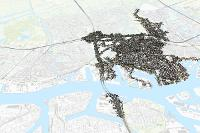

In [3]:
schiedam_scene_item = portal_gis.content.get('66df54bcdfd3453ab61cf6f8a25262bc')
schiedam_scene_item

Then, the WebMap or WebScene item instance that you want to visualize, can be passed into the `arcgis.widgets.MapView` as to create a mapping widget for Jupyter Notebooks. Also note that, you can specify the `mode` property as for whether to construct a `2D` map or `3D` map. 

In the following, we will make five stops at the scene by tuning the center, tilt, heading and zoom properties of the map view.

### Railway


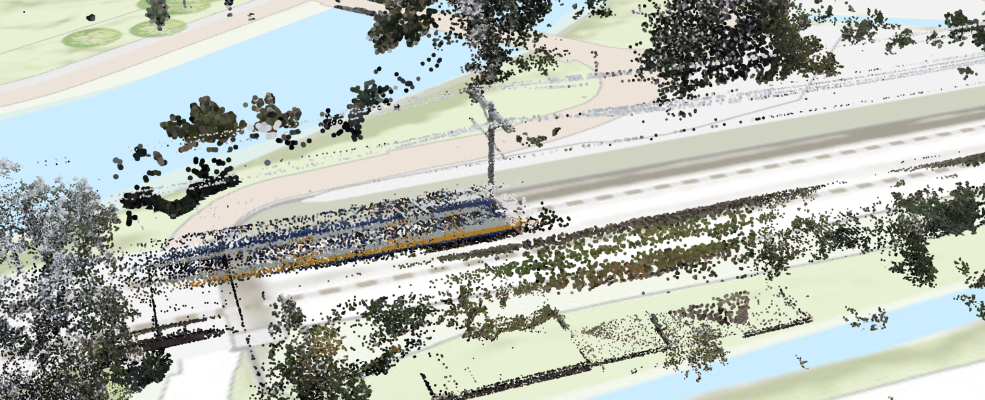

In [6]:
from arcgis.widgets import MapView
scene = MapView(item=schiedam_scene_item, mode='3D',gis=portal_gis)
scene

In [5]:
# railway and train at the scene
scene.center = {'spatialReference': {'latestWkid': 28992, 'wkid': 28992},
                'x': 85398.31540750456,
                'y': 437220.35444851307,
                'z': 0}
scene.tilt, scene.heading, scene.zoom = (81.53979757060198,
                                         187.34757708117183,
                                         15.741196525166101)

The scene viewer should be now showing the railway and a forthcoming train, looking like -

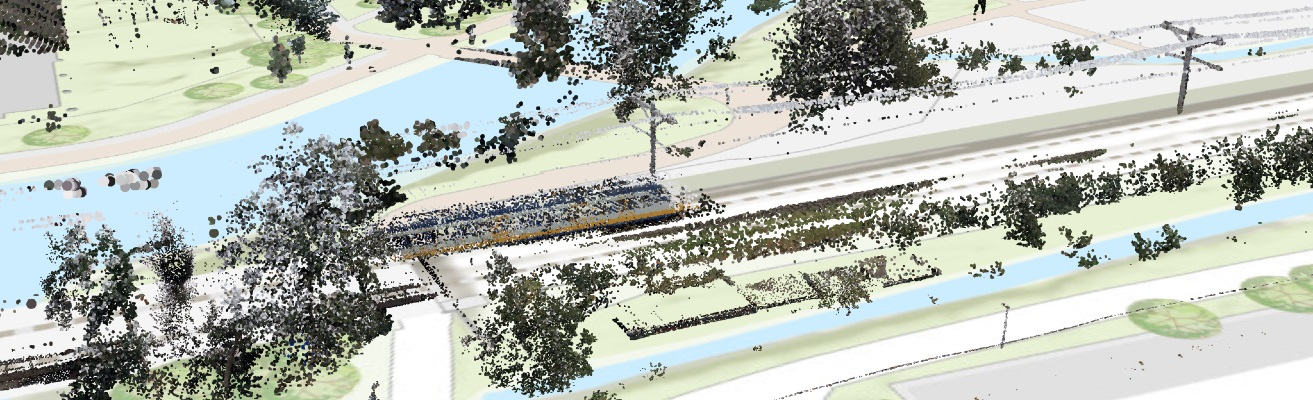

Now let's compare with a reality scene. Image shown below is referenced from <a href="https://www.google.com/maps/place/Esther+Vergeerstraat,+Schiedam,+Netherlands/@51.9202084,4.3757655,43a,35y,172.27h,69.88t/data=!3m1!1e3!4m5!3m4!1s0x47c44aa038ebfb6f:0x7fbaac51bf61a363!8m2!3d51.9192748!4d4.372825">Google Map</a>, the same scene looks like:

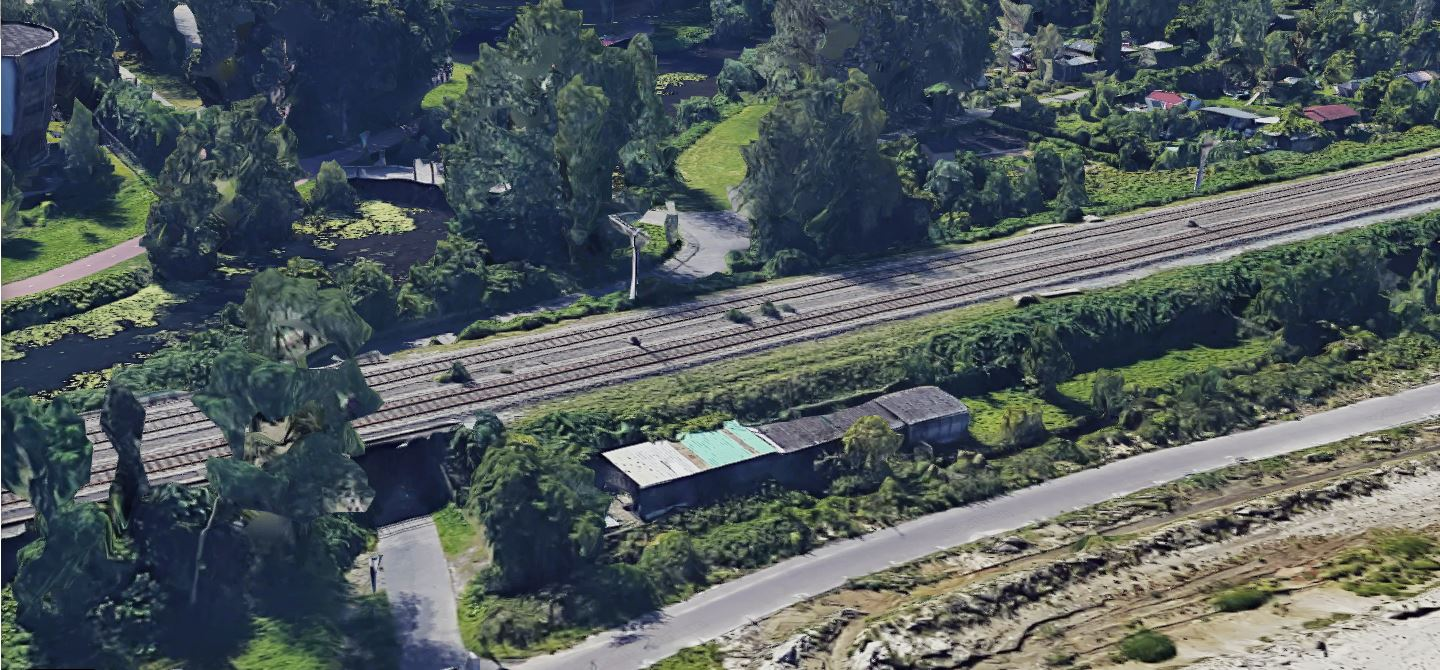

### Regional Center

In [ ]:
# SBM Offshore Netherlands Regional Center
scene.center = { 'spatialReference': {'latestWkid': 28992, 'wkid': 28992},
                 'x': 85235.92769975544,
                 'y': 436023.8007402745,
                 'z': 36.642714876706016}
scene.tilt, scene.heading, scene.zoom = (81.05967631732133,
                                         39.727275362615764,
                                         13.715293060470547)

When the scene has been re-centered, and its tilt, heading and zoom have been changed, the scene viewer now displays the buildings of SBM Offshore Netherlands Regional Center.

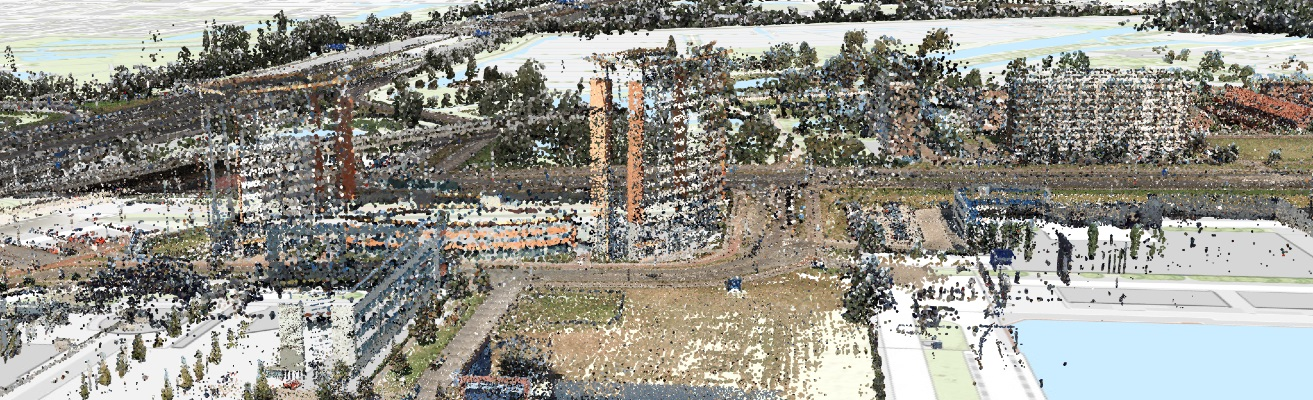

Comparatively, the same scene being viewed at <a href="https://www.google.com/maps/place/SBM+Offshore+Netherlands+Regional+Center/@51.9056748,4.3796669,255a,35y,317.81h,63.51t/data=!3m1!1e3!4m5!3m4!1s0x47c4357d498f3f23:0xdc749714a8e5652d!8m2!3d51.9084751!4d4.3733406">Google</a> is like -


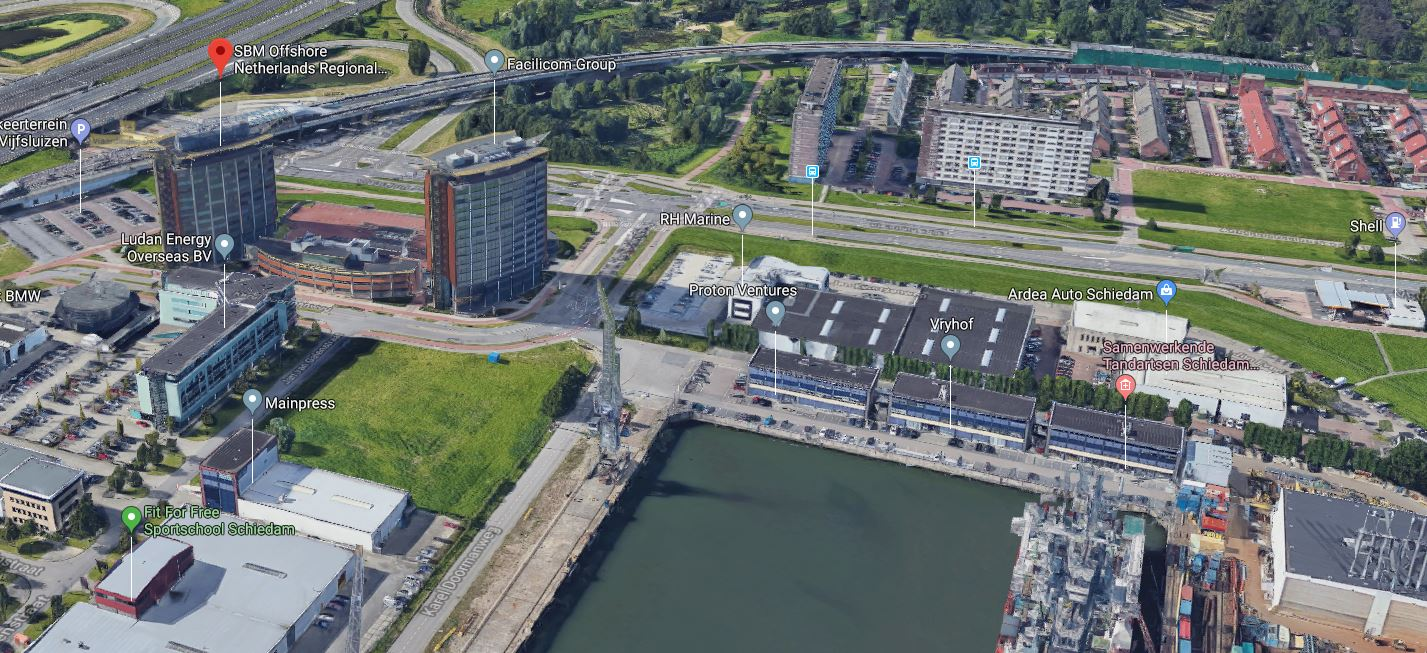

### Highway A4

In [ ]:
# Traffic signs on Highway A4
scene.center = { 'spatialReference': {'latestWkid': 28992, 'wkid': 28992},
                 'x': 85595.92102788955,
                 'y': 433985.32739689114,
                 'z': 16.0787144415553}
scene.tilt, scene.heading, scene.zoom = (94.61610697203402,
                                         351.00251758056254,
                                         15.43847823387418)

Again, let's recenter and change the tilt, heading and zoom to point to another site. The scene viewer should display traffic signs on the highway A4:

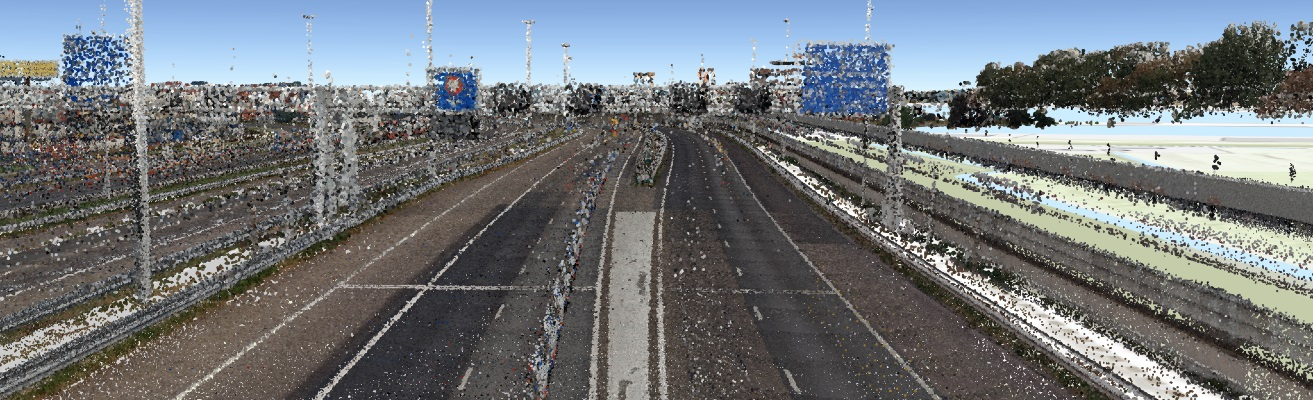

Its equivalent scene to be viewed from <a href="https://www.google.com/maps/place/Propaanweg,+3196+KH+Vondelingenplaat,+Netherlands/@51.8888272,4.3791198,34a,35y,343.12h,79.3t/data=!3m1!1e3!4m5!3m4!1s0x47c43586e16fc953:0x244aad9a7ae86119!8m2!3d51.8916192!4d4.3724892">Google Map</a> is like -

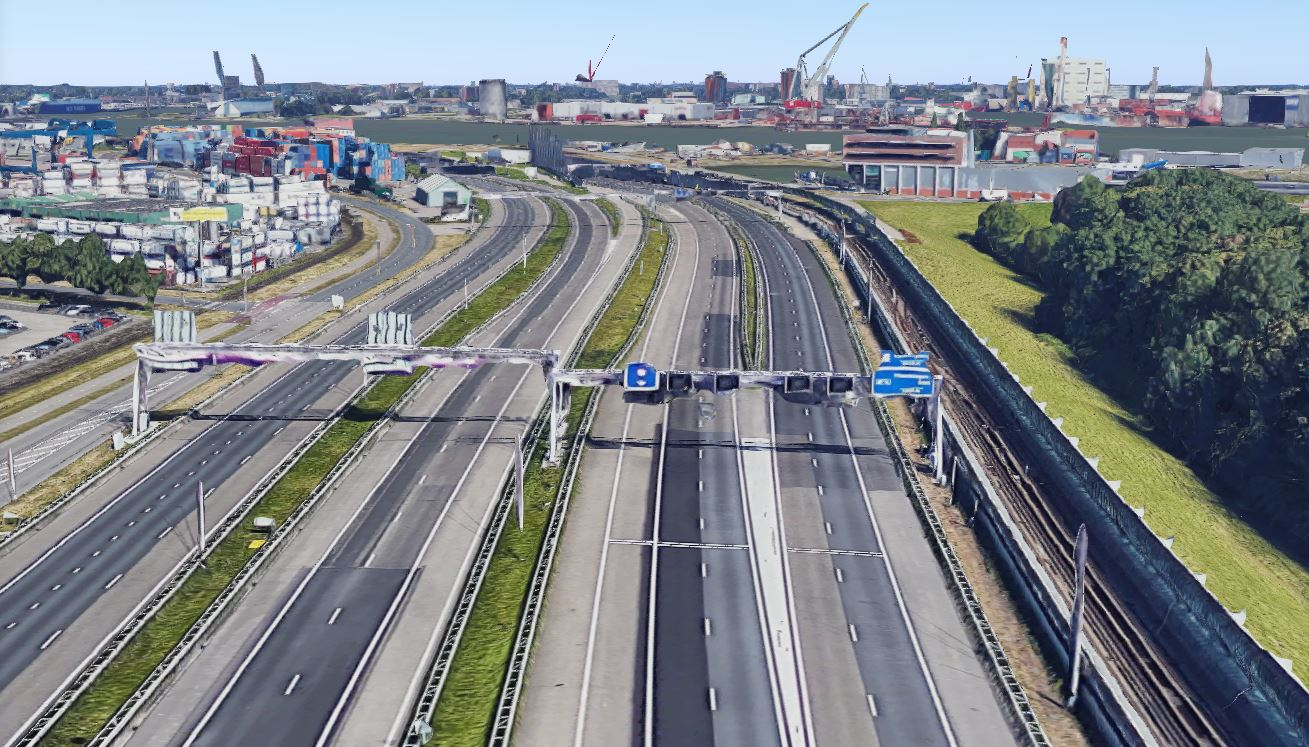

In [ ]:
# Tree and slope
scene.center = { 'spatialReference': {'latestWkid': 28992, 'wkid': 28992},
                 'x': 84625.68309486349,
                 'y': 438217.32669163344,
                 'z': 13.603902693833437}
scene.tilt, scene.heading, scene.zoom = (82.51942417352721,
                                         66.84105227916292,
                                         15.61038759230817)

### Near the S.C. Vlaardingen Holy

The scene viewer should display the tree, slope and tunnel on the right, and a building on the left. 

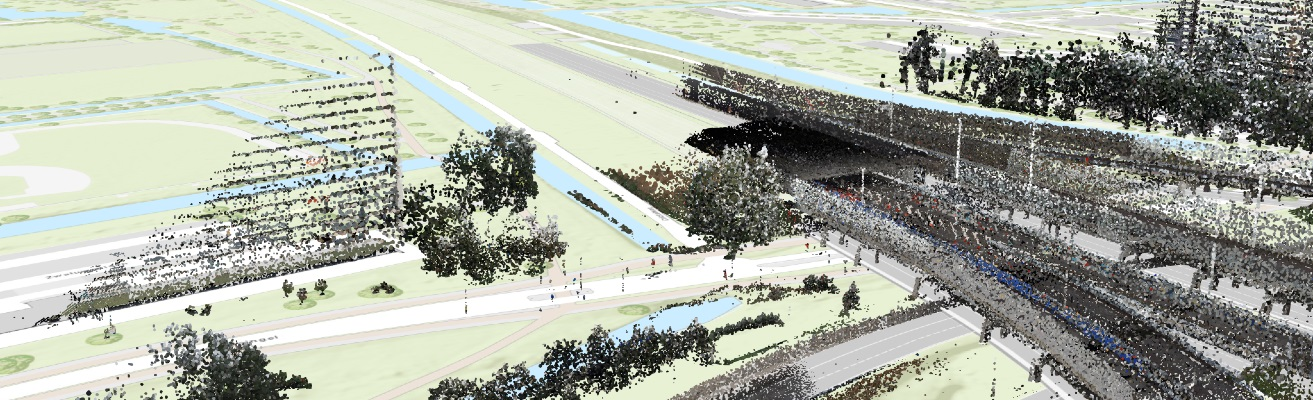

Viewing from <a href="https://www.google.com/maps/place/Zwanensingel,+Schiedam,+Netherlands/@51.9253427,4.3614827,149a,35y,18.19h,68.45t/data=!3m1!1e3!4m5!3m4!1s0x47c44abb0967da87:0x6658e636225b7af5!8m2!3d51.9267854!4d4.358235">Google Map</a>, the scene would look like -

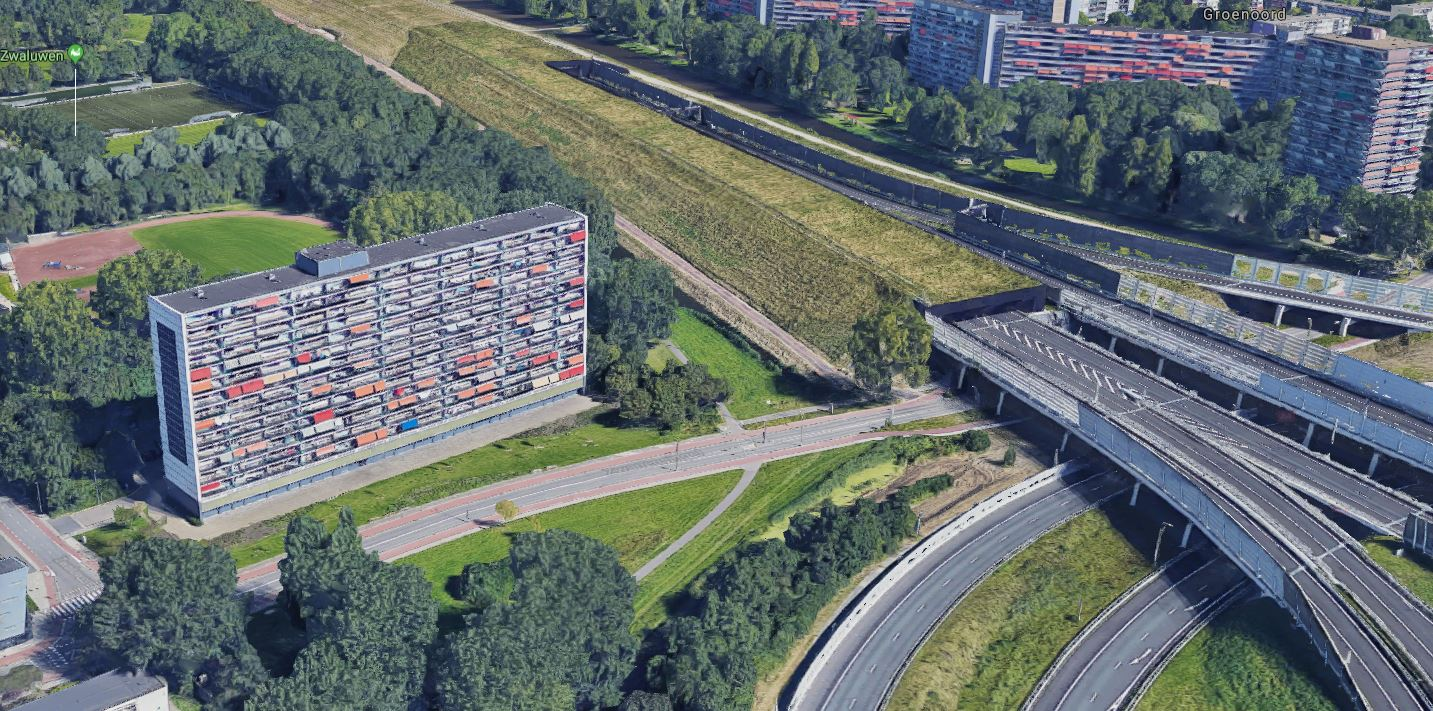

### De Kameel

In [ ]:
# pier and mill
scene.center = { 'spatialReference': {'latestWkid': 28992, 'wkid': 28992},
                 'x': 87144.11505859773,
                 'y': 437224.19852261676,
                 'z': -0.23741918233604054}
scene.tilt, scene.heading, scene.zoom = (64.09831525952025,
                                         201.80253891421367,
                                         14.19748238071214)

Shifting center to point to the mill `De Kameel`, the scene viewer will now look like -

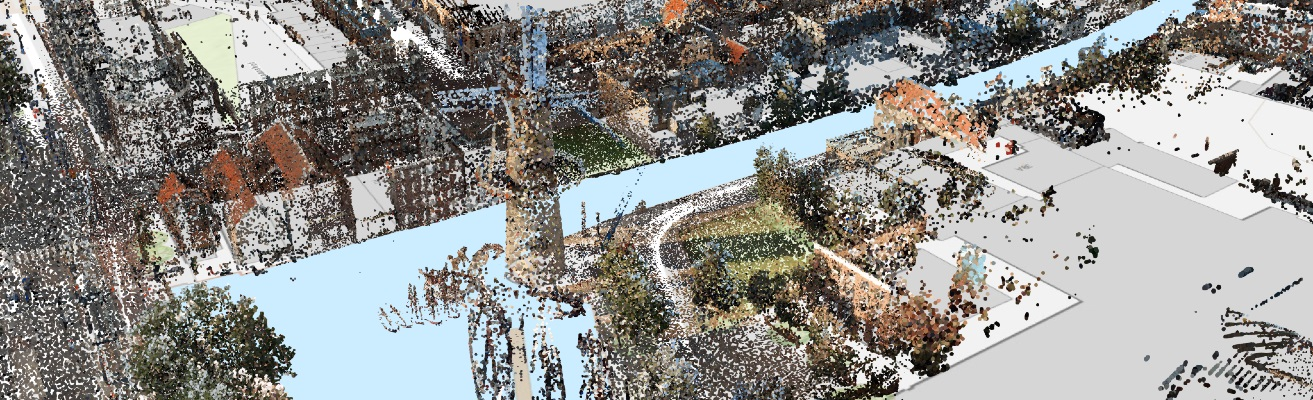

When the equivalent scene is viewed from <a href="https://www.google.com/maps/place/De+Kameel/@51.9216692,4.401799,115a,35y,184.5h,66.08t/data=!3m1!1e3!4m12!1m6!3m5!1s0x47c4353fcb155169:0xb98fad4bb8e0603d!2sProveniershuis!8m2!3d51.9192646!4d4.4026426!3m4!1s0x47c4356b22804395:0x31112935d5c4ee44!8m2!3d51.9194932!4d4.4012884">Google Map</a>, it is looking like -

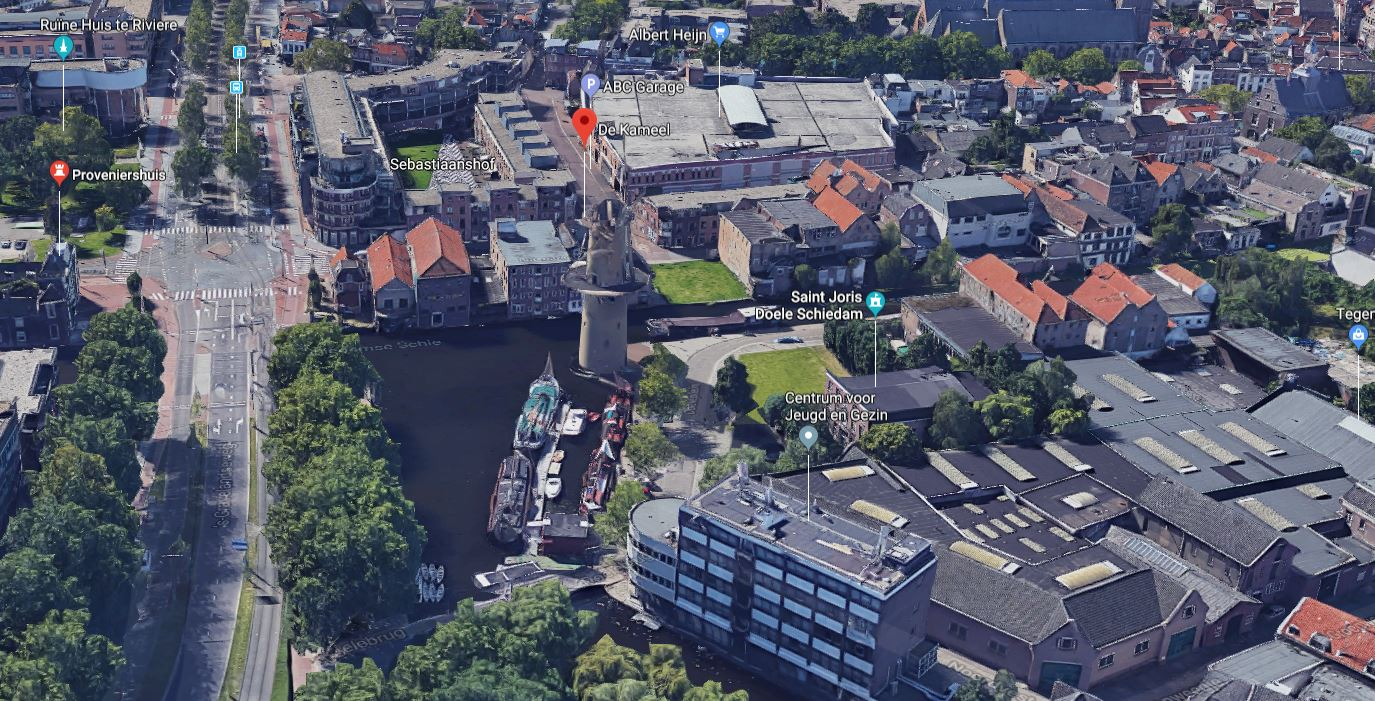

## Example 2: Barnegat Bay, New Jersey

Geographically, Barnegat Bay is famous not only because it is separated from the Atlantic by the long Barnegat Peninsula, as well as by the north end of Long Beach Island, but also it is a small brackish arm of the Atlantic Ocean, approximately 42 miles long, along the coast of Ocean County, New Jersey in the United States. In this second example, we will be exploring Barnegat Bay with LiDAR data.

First, let's look at the LiDAR point clouds signaling elevation:

In [18]:
webscene_search = gis.content.search("Barnegat Bay LiDAR ELEV", item_type="Web Scene")
webscene_search[0]

<Item title:"Barnegat Bay Lidar Elev" type:Web Scene owner:arcgis_python>

### Water front

When LiDAR points at Barnegate Bay is set to view elevation only, trees and shrubs in the scene are represented in red or yellow, while land (above sea levels) are shown in green.


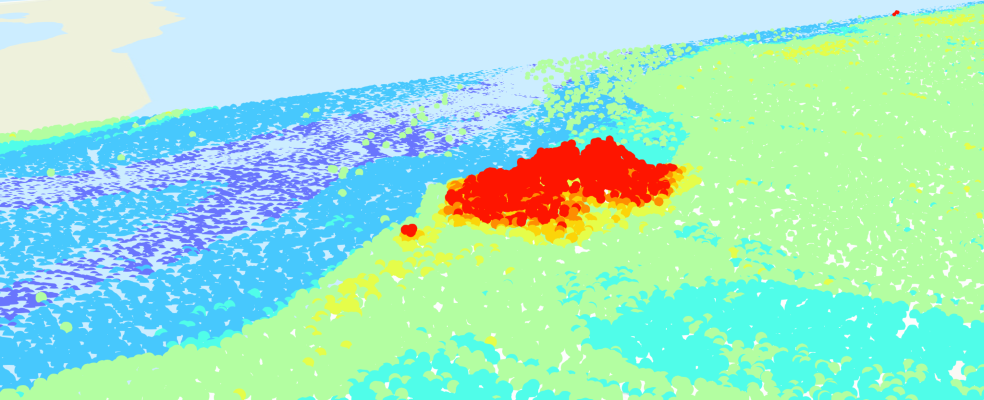

In [23]:
scene = MapView(item=webscene_search[0], mode='3D')
scene

In [17]:
# coastline
scene.center = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 
                'x': -8249051.478098774, 
                'y': 4836456.125649312, 
                'z': 2.208561730571091}
scene.tilt, scene.heading, scene.zoom = (71.84032884536968,
                                         307.0846270176005,
                                         19.689257113249976)

As a comparison, if viewed from <a href="https://www.google.com/maps/place/Barnegat+Bay/@39.795015,-74.0982251,205a,35y,291.56h,60.04t/data=!3m1!1e3!4m5!3m4!1s0x89c198cb149883c5:0x75c8061884d5f0dd!8m2!3d39.8672928!4d-74.1122506">Google Map</a>, the water front looks like -

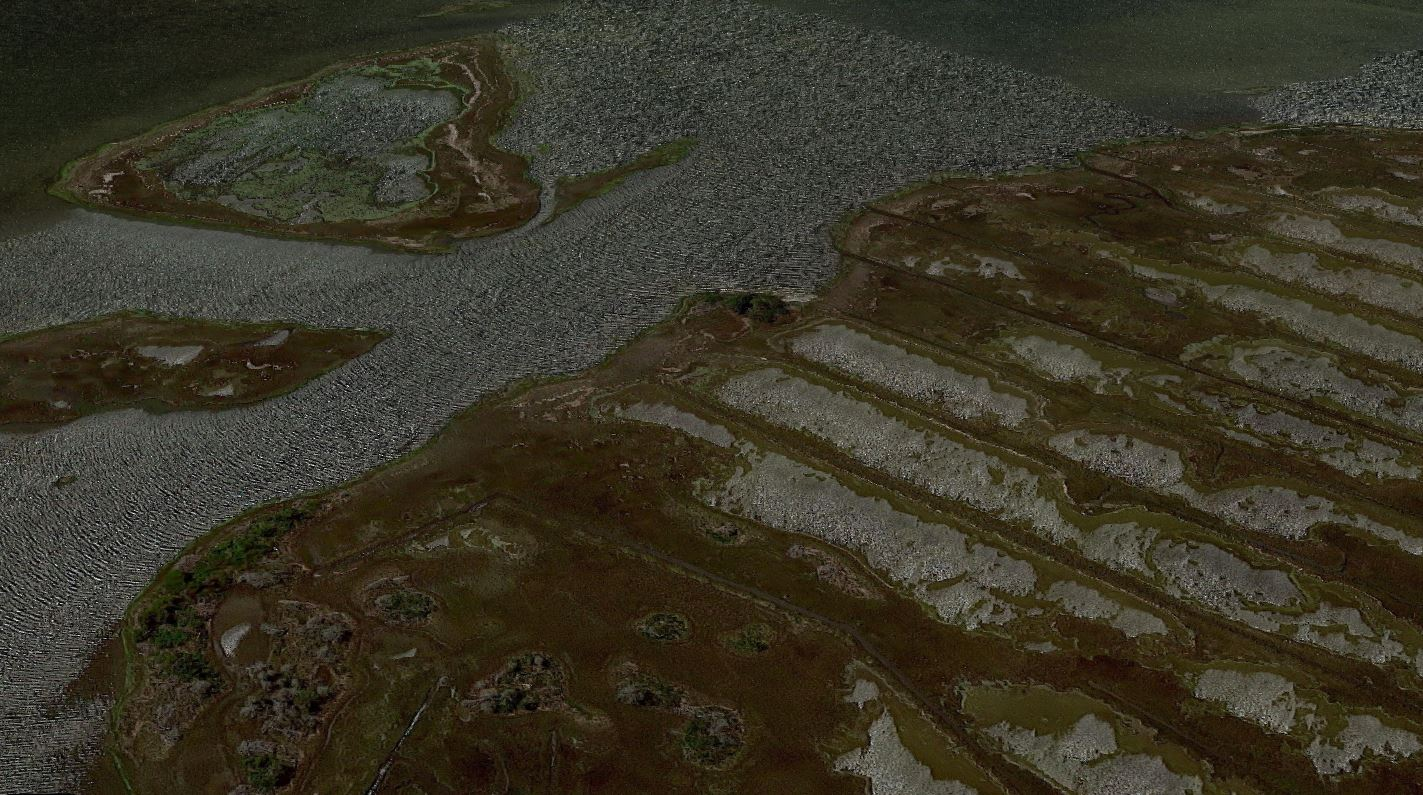

Drawing style can be selected from:
 - Source Color (RGB)
 - Class
 - Elevation
 - Intensity
 
We can further explore how different drawing styles can deliver various aspects of the same scene:

In [25]:
webscene_search = gis.content.search("Barnegat Bay", item_type="Web Scene", outside_org = True)
webscene_search

[<Item title:"Barnegat Bay Example with LiDAR" type:Web Scene owner:BPatrick_Geodesign>,
 <Item title:"3D PS Point Cloud Layer: Barnegat Bay by javier_zurich" type:Web Scene owner:pwfm11>,
 <Item title:"Point Cloud Layer: Barnegat Bay - Altitude" type:Web Scene owner:glavenu_ef>,
 <Item title:"Barnegat_Bay_LiDAR_CLASS" type:Web Scene owner:sharing1>,
 <Item title:"Barnegat Bay Lidar Elev" type:Web Scene owner:arcgis_python>,
 <Item title:"Barnegat Bay with Class" type:Web Scene owner:yann9059>,
 <Item title:"Barnegat_Bay_LiDAR_test" type:Web Scene owner:sharing1>,
 <Item title:"Point Cloud Layer: Barnegat Bay - colors" type:Web Scene owner:glavenu_ef>,
 <Item title:"Point Cloud Layer: Barnegat Bay" type:Web Scene owner:javier_zurich>]

When the `BARNEGAT_BAY_LAS_UTM.lasd` is published and shared as <a href="https://tiles.arcgis.com/tiles/V6ZHFr6zdgNZuVG0/arcgis/rest/services/BARNEGAT_BAY_LiDAR_UTM/SceneServer/layers/0">Web Scene</a>, 1.1 Billion points are shown in this example Point Cloud layer from LiDAR scan and using the captured color as RGB renderer.


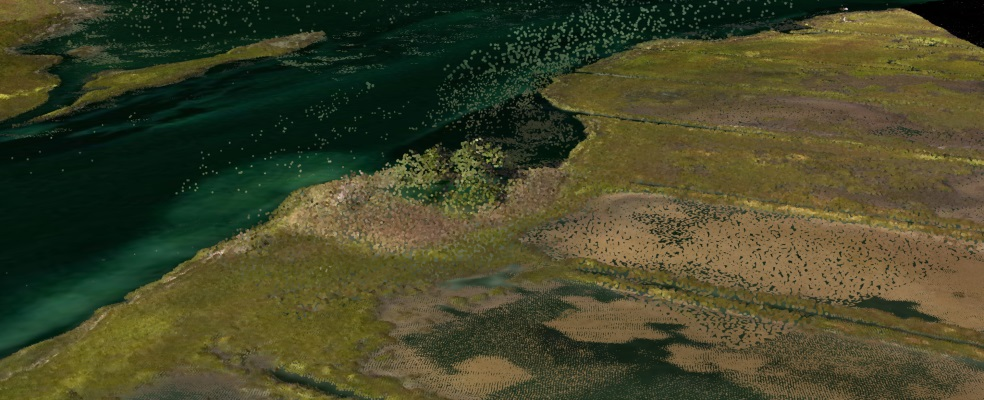

In [73]:
scene1 = MapView(item=webscene_search[0], mode='3D')
scene1

Customized method `sync_two_scenes` is defined here to tune the properties of a map view to be identical to another.

In [74]:
def sync_two_scenes(scene_ref, scene_fol):
    scene_fol.center = scene_ref.center
    scene_fol.heading = scene_ref.heading
    scene_fol.tilt = scene_ref.tilt
    scene_fol.zoom = scene_ref.zoom
    print(scene_ref.center)
    print(scene_ref.tilt, scene_ref.heading, scene_ref.zoom)

In [75]:
# sync scene 1 to be of the same setting as scene
sync_two_scenes(scene, scene1)

{'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'x': -8249051.478098774, 'y': 4836456.125649312, 'z': 2.208561730571091}
71.84032884536968 307.0846270176005 19.689257113249976


Comparing with the elevation rendering (shown in `scene` previously), the RGB rendering in `scene1` is close to the natual color display of the site.


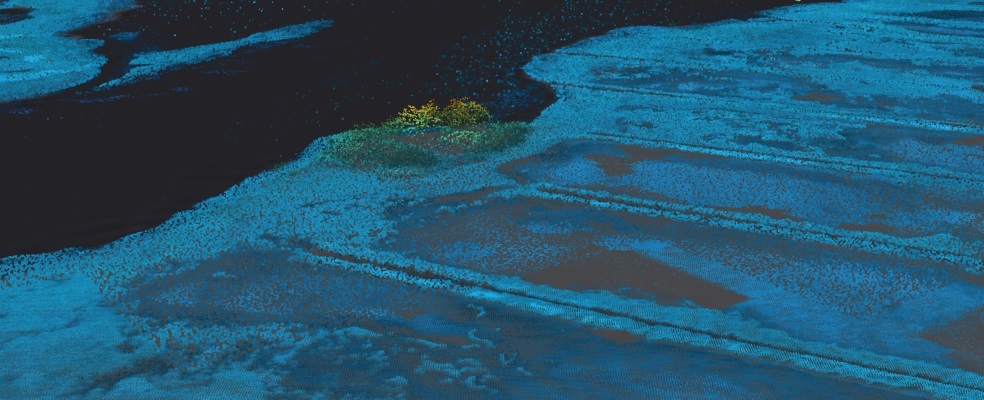

In [79]:
# <Item title:"Point Cloud Layer: Barnegat Bay - Altitude" type:Web Scene owner:glavenu_ef>
scene2 = MapView(item=webscene_search[2], mode='3D')
scene2

In [83]:
sync_two_scenes(scene, scene2)

{'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'x': -8248913.766348348, 'y': 4836384.616433245, 'z': 1.8467096919193864}
89.45628249677667 8.220918528337286 17.179738099252905


In [85]:
scene2.legend = True

Though not shown in the map view being captured in screenshot, you can set `legend` property to `True` to provide detailed legend information on the map view. Here, the legend displays the color ramp according to its elevation -

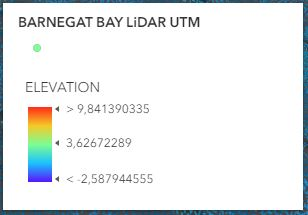

### Water tank

In [47]:
# water tank
scene1.center = { 'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
                  'x': -8249767.70517625,
                  'y': 4830660.583158518,
                  'z': 5.24512467160821}
scene1.tilt, scene1.heading, scene1.zoom = ( 75.59846376573785,
                                             18.74850439182576,
                                             18.856453837698247)

Shifting the center to point at the water tank, and `scene1` should look like -

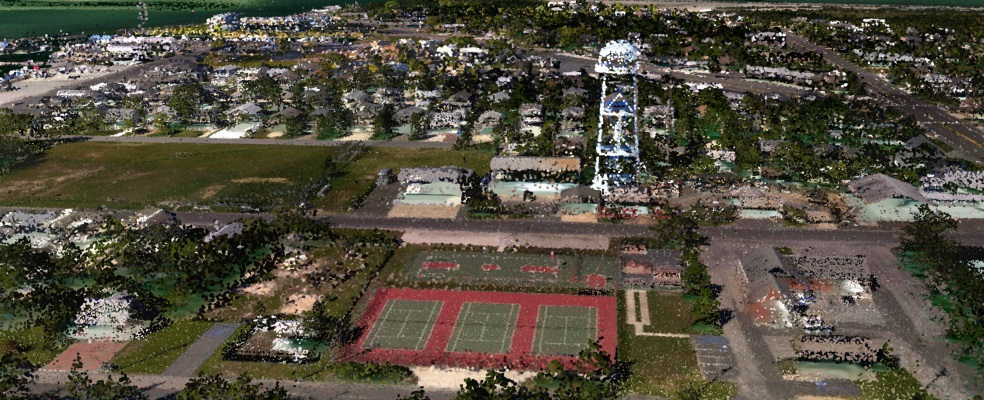

In [27]:
sync_two_scenes(scene1, scene2)

({'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
  'x': -8249776.84014833,
  'y': 4830673.025271038,
  'z': 1.3577259741723537},
 80.23577134508056,
 321.99743761239836,
 18.76339476031755)

Aligning `scene2` to show the same spatial parameters, it should look like -

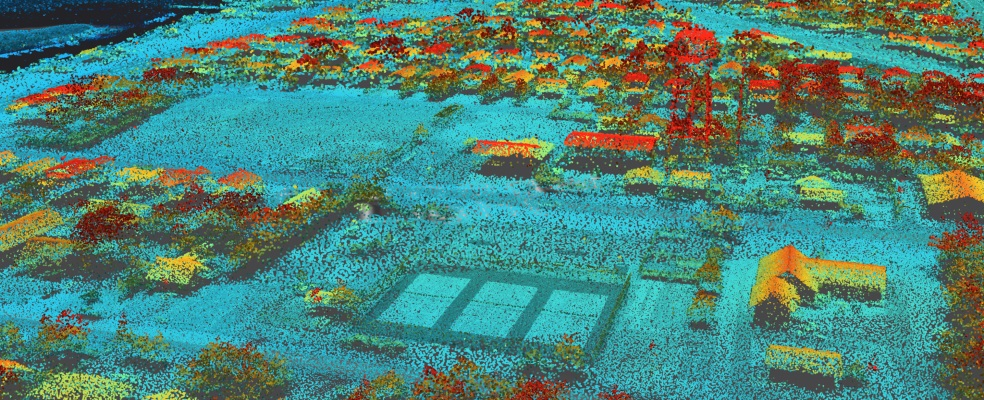

Comparing to its equivalent in <a href="https://www.google.com/maps/place/Barnegat+Bay/@39.7543212,-74.1098643,309a,35y,10.31h,39.43t/data=!3m1!1e3!4m5!3m4!1s0x89c198cb149883c5:0x75c8061884d5f0dd!8m2!3d39.8672928!4d-74.1122506">Google Map</a>,

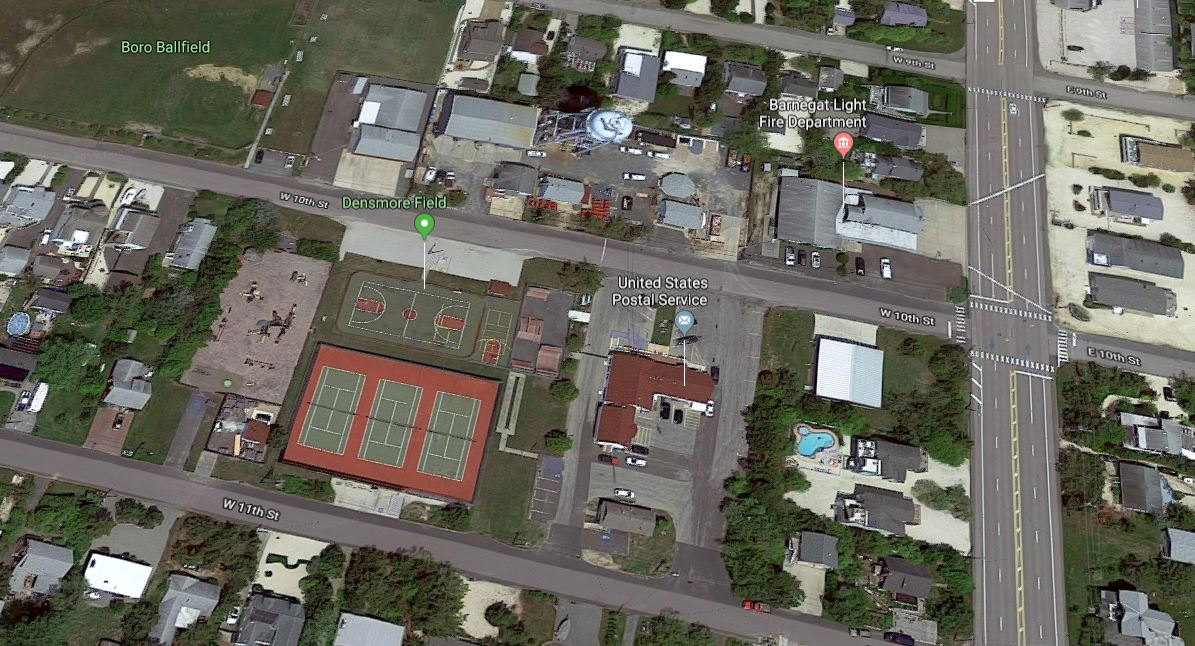

### Light House

In [86]:
#light house
scene1.center = { 'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
                  'x': -8249282.870173985,
                  'y': 4831782.523431202,
                  'z': 2.5254555651918054}
scene1.tilt, scene1.heading, scene1.zoom = ( 82.67199749167406,
                                             78.65089100732057,
                                             18.218739923162396)

Shifting the center to point at the light house, and `scene1` should look like -

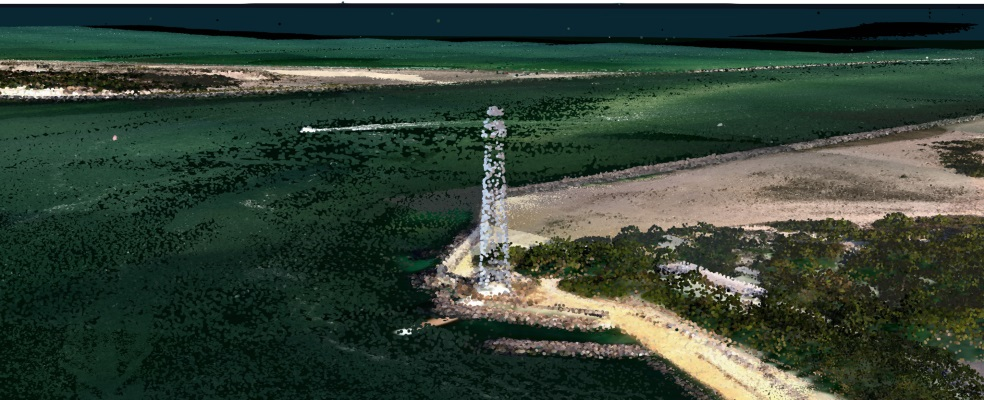

In [59]:
sync_two_scenes(t_scene, scene3)

{'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'x': -8249292.152750595, 'y': 4831798.207182487, 'z': 0.7433118531480432} 79.7199799586995 78.80446917369285 18.138221935254826


Aligning `scene2` to show the same spatial parameters, the scene viewer should look like -

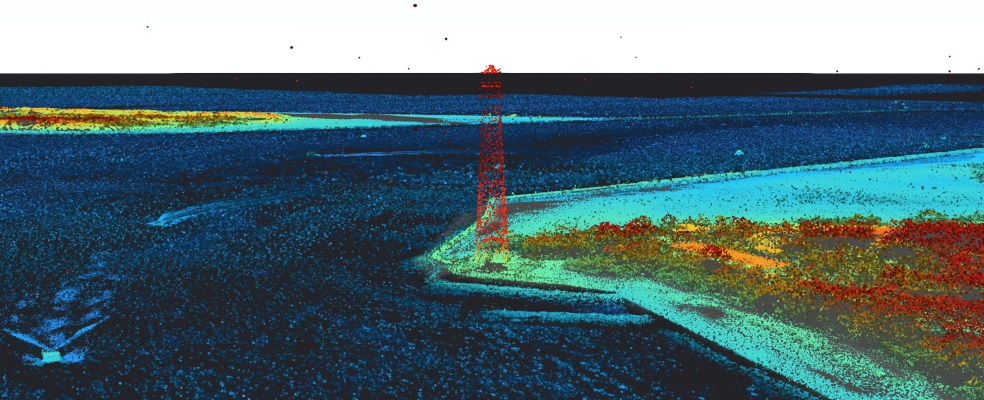

Comparing to its equivalent in <a href="https://www.google.com/maps/place/Barnegat+Bay/@39.7640504,-74.111278,386a,35y,77.81h,55.82t/data=!3m1!1e3!4m5!3m4!1s0x89c198cb149883c5:0x75c8061884d5f0dd!8m2!3d39.8672928!4d-74.1122506">Google Maps</a>, which looks like -


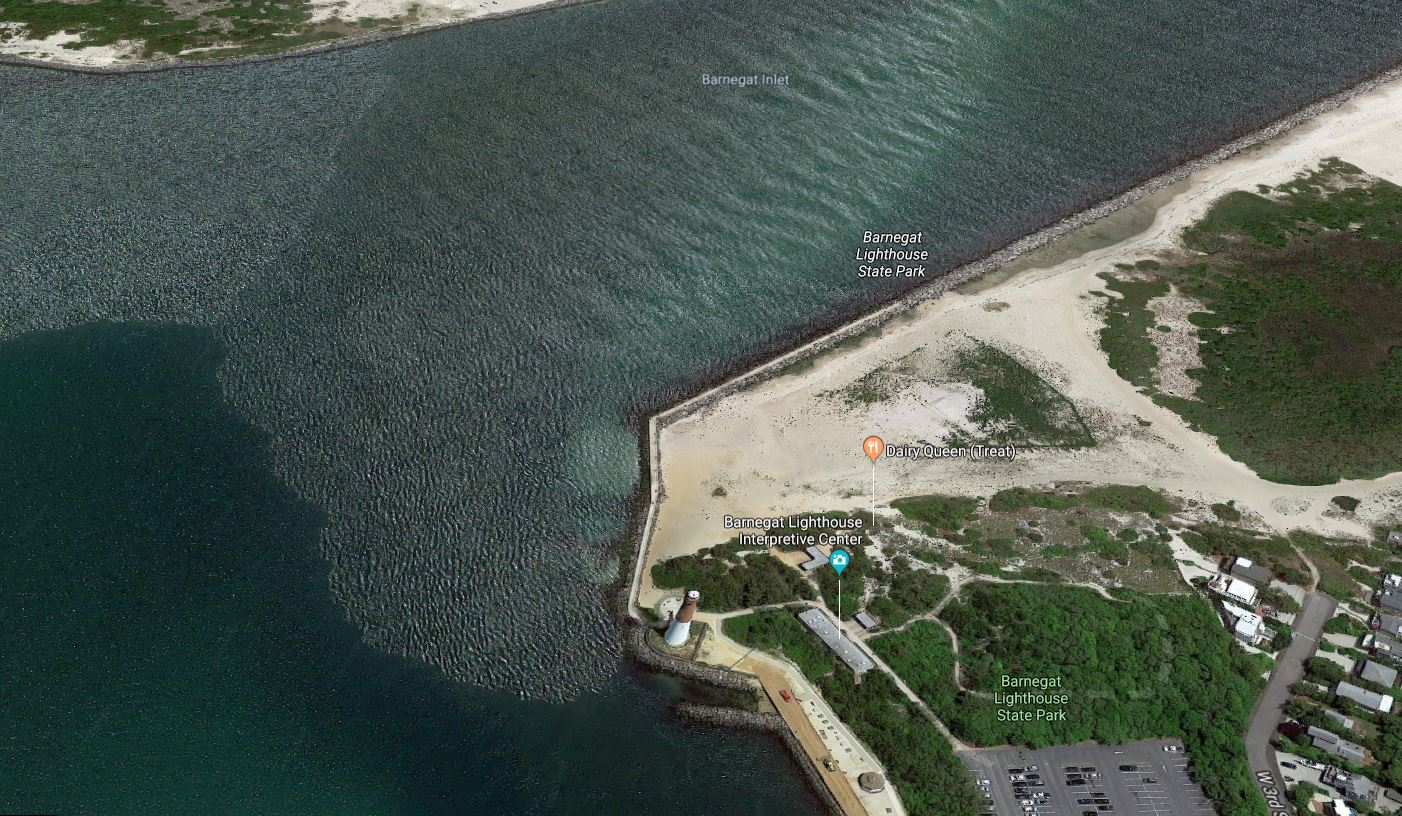

In this notebook, we have explored how the LiDAR point clouds can be viewed in Scene Viewer, how configuring the scene properties such as center, extent, tilt, heading and zoom can shift from one site to another, and how to study various aspects of the scene by changing the drawing styles of the LiDAR point clouds. 

Next, <a href="#lidar_basics_operations_part1b.ipynb">Part 1(b)</a> will then cover commonly seen use cases with LAS datasets, such as managing, editing, analyzing, visualizing and sharing LiDAR data. Please stick with us in exploring more advanced topics in the following notebooks.

## References

[1] https://www.esri.com/arcgis-blog/products/product/3d-gis/learn-by-doing-create-the-city-of-schiedam-3d-web-scene/

<a href="#Table-of-Contents">Back to the Top</a>